In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support, confusion_matrix, accuracy_score
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('country_wise_latest.csv')

In [3]:
x = df[['Confirmed', 'Active', 'Recovered / 100 Cases']]
y = df['Deaths / 100 Cases']

In [4]:
x_train = x[:131]
x_test = x[131:]

y_train = y[:131]
y_test = y[131:]

In [5]:
linearRegModel = LinearRegression()

linearRegModel.fit(x_train, y_train)

LinearRegression()

In [6]:
predictions = linearRegModel.predict(x_test)
print(predictions)

[2.8521469  3.28035688 3.37698756 2.7353232  2.81951647 2.54095582
 3.01219673 3.80364846 3.02269598 2.49247008 2.44263676 2.68491824
 2.41003223 2.5428426  2.95978695 2.82303323 3.78627339 3.27770692
 2.70386397 2.54592153 2.70101151 2.57115159 3.07653057 3.43138696
 2.46614176 3.03639884 3.30810223 2.67978471 3.03230131 2.87018518
 3.81730742 2.52704785 3.77510055 2.39146056 2.57444638 3.25279554
 2.40876514 3.77476006 2.76663859 2.51810411 2.62125556 2.78692127
 7.01262902 2.50619006 3.04539679 2.57488215 3.95998489 2.62669139
 2.99849923 2.88877859 2.54466174 3.27067652 2.61220356 3.06123027
 2.88165701 3.48543394]


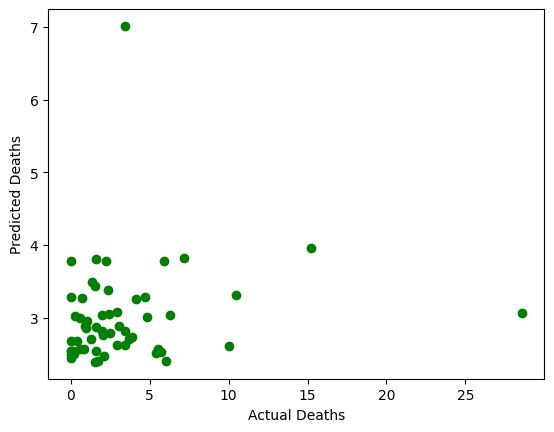

In [7]:
plt.scatter(y_test, predictions, color='g')
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.show()

In [8]:
mse = mean_squared_error(y_test, predictions)
print(mse)

19.77795136072621


In [9]:
max_value = df['Deaths / 100 Cases'].max()
print("Max Value: ", max_value)

min_value = df['Deaths / 100 Cases'].min()
print("Min Value: ", min_value)

Max Value:  28.56
Min Value:  0.0


In [10]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(x_train)

KMeans(n_clusters=2, n_init=40)

In [11]:
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(x_train)

KMeans(n_clusters=3, n_init=40)

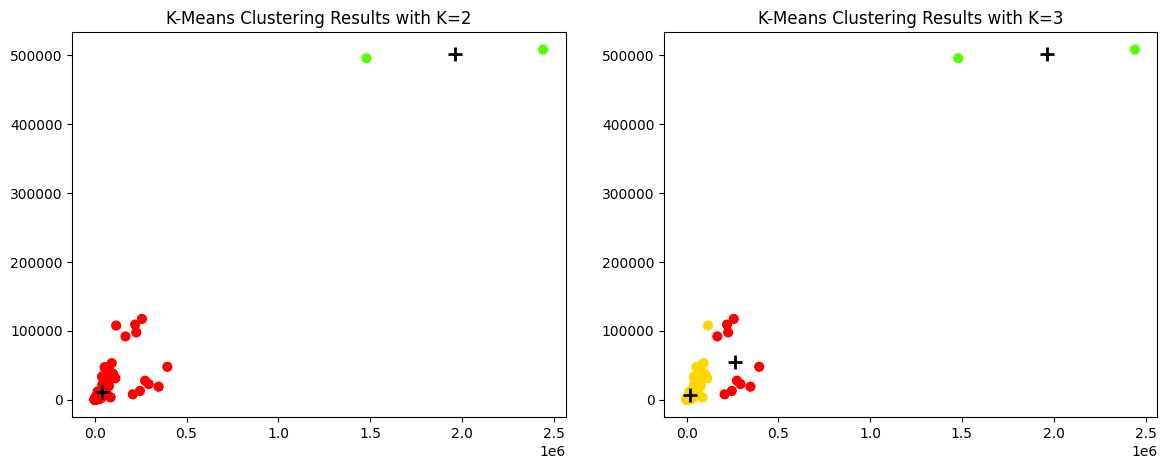

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.scatter(x_train['Confirmed'], x_train['Active'], s=40, c=km1.labels_, cmap=plt.cm.prism)
ax1.set_title('K-Means Clustering Results with K=2')
ax2.scatter(x_train['Confirmed'], x_train['Active'], s=40, c=km2.labels_, cmap=plt.cm.prism)
ax2.set_title('K-Means Clustering Results with K=3')

ax1.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], marker='+', s=100, c='k', linewidth=2)
ax2.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], marker='+', s=100, c='k', linewidth=2)

In [13]:
xKNN = df[['Confirmed', 'Active', 'Recovered / 100 Cases', 'Deaths / 100 Cases']]
yKNN = df['Americas']

In [14]:
logregmodel = LogisticRegression()

knn = KNeighborsClassifier(5)

In [15]:
logregmodel.fit(xKNN, yKNN)
knn.fit(xKNN, yKNN)

KNeighborsClassifier()

In [16]:
logmodelpreds = logregmodel.predict(xKNN)
knnmodelpreds = knn.predict(xKNN)

In [17]:
logconf = confusion_matrix(yKNN, logmodelpreds, labels=knn.classes_)
print("Logistical Regression: \n", logconf)

KNNconf = confusion_matrix(yKNN, knnmodelpreds, labels=knn.classes_)
print("KNN: \n", KNNconf)

Logistical Regression: 
 [[148   4]
 [ 32   3]]
KNN: 
 [[148   4]
 [ 27   8]]


In [18]:
logacc = accuracy_score(yKNN, logmodelpreds)
print("Logistical Regression: ", logacc)

KNNacc = accuracy_score(yKNN, knnmodelpreds)
print("KNN: ", KNNacc)

Logistical Regression:  0.8074866310160428
KNN:  0.8342245989304813


In [19]:
precision_recall_fscore_support(yKNN, logmodelpreds, average='binary')

(0.42857142857142855, 0.08571428571428572, 0.14285714285714285, None)

In [20]:
precision_recall_fscore_support(yKNN, knnmodelpreds, average='binary')

(0.6666666666666666, 0.22857142857142856, 0.3404255319148936, None)